# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "MRI-ESM1"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/huss_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.643481731414795 to load the data
*********Start to merge*********
It takes elapsed_time 0.043529510498046875 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.14452552795410156 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.919878005981445 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6738941669464111 to mask the layer
*********Start to plot the layer*********


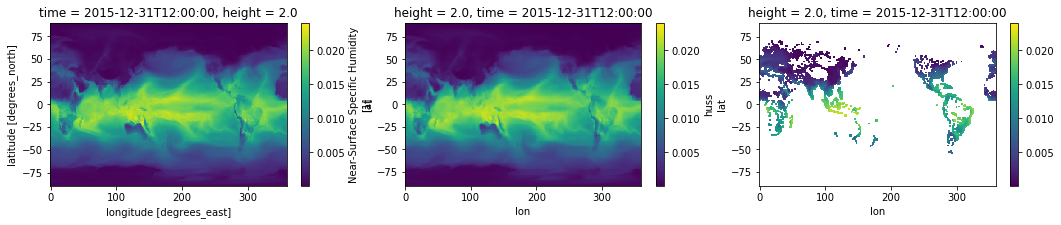

It takes elapsed_time 0.7894992828369141 to plot the layer
It takes elapsed_time 18.217212915420532 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/tas_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 2.3658134937286377 to load the data
*********Start to merge*********
It takes elapsed_time 0.05168485641479492 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.10502028465270996 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.439521312713623 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6694362163543701 to mask the layer
*********Start to plot the layer*********


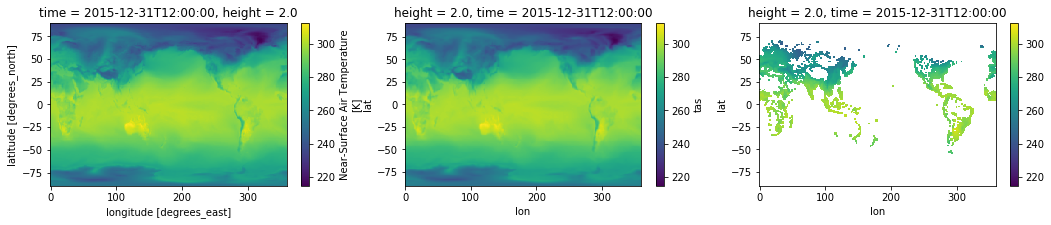

It takes elapsed_time 0.8325865268707275 to plot the layer
It takes elapsed_time 18.46661925315857 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/uas_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.5917940139770508 to load the data
*********Start to merge*********
It takes elapsed_time 0.03034353256225586 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.08806300163269043 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.376803636550903 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6546132564544678 to mask the layer
*********Start to plot the layer*********


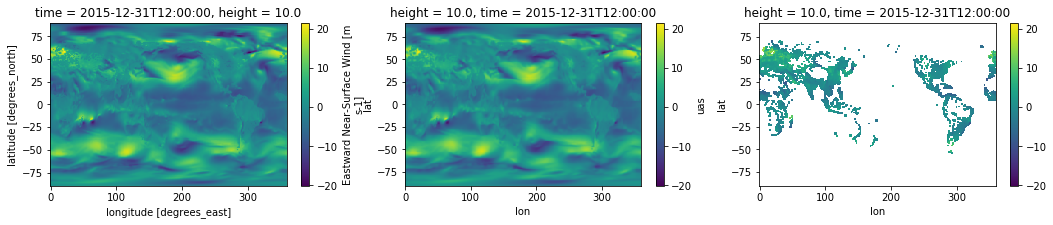

It takes elapsed_time 0.7472152709960938 to plot the layer
It takes elapsed_time 17.489883422851562 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/vas_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.5133442878723145 to load the data
*********Start to merge*********
It takes elapsed_time 0.04697918891906738 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.10119843482971191 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.407245397567749 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6648006439208984 to mask the layer
*********Start to plot the layer*********


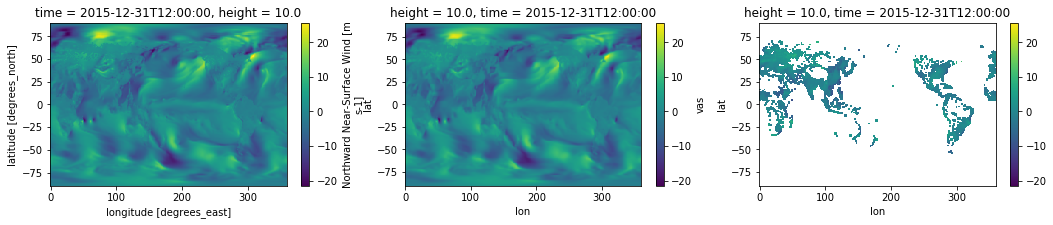

It takes elapsed_time 0.7462687492370605 to plot the layer
It takes elapsed_time 17.481475353240967 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/pr_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.6701080799102783 to load the data
*********Start to merge*********
It takes elapsed_time 0.029842853546142578 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.09707331657409668 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.437328338623047 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6564371585845947 to mask the layer
*********Start to plot the layer*********


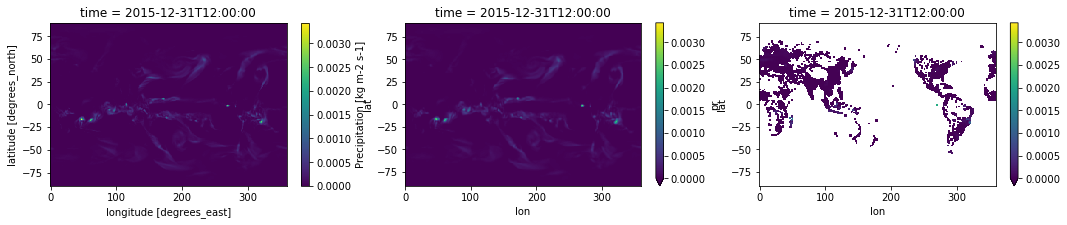

It takes elapsed_time 0.6790256500244141 to plot the layer
It takes elapsed_time 17.571090936660767 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/prsn_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.8553519248962402 to load the data
*********Start to merge*********
It takes elapsed_time 0.029918193817138672 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.05581045150756836 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.765607833862305 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6545438766479492 to mask the layer
*********Start to plot the layer*********


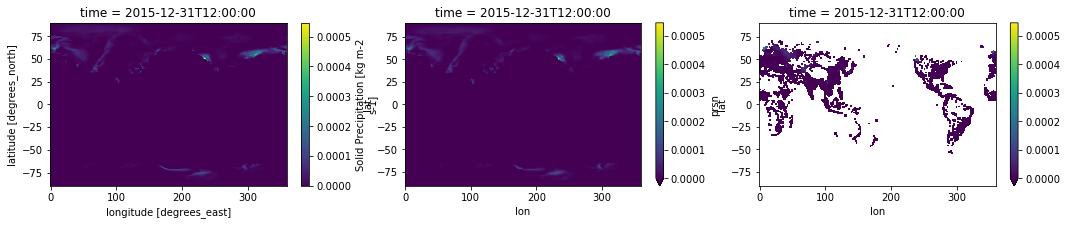

It takes elapsed_time 0.6621599197387695 to plot the layer
It takes elapsed_time 18.02437400817871 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rlds_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.775815486907959 to load the data
*********Start to merge*********
It takes elapsed_time 0.02935957908630371 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.07653379440307617 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.293700695037842 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6520295143127441 to mask the layer
*********Start to plot the layer*********


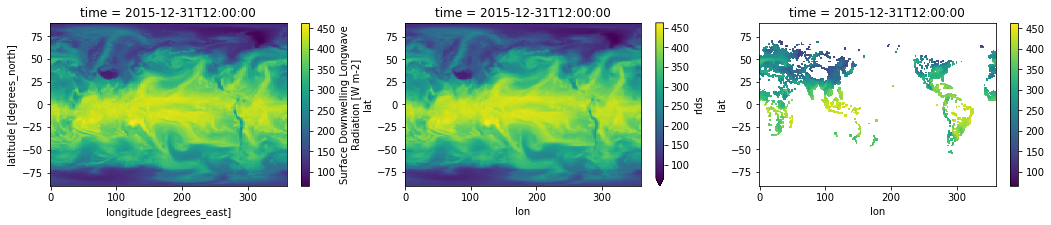

It takes elapsed_time 0.7317013740539551 to plot the layer
It takes elapsed_time 17.560011863708496 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rlus_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.7653250694274902 to load the data
*********Start to merge*********
It takes elapsed_time 0.029490232467651367 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.08692383766174316 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.424066066741943 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6925420761108398 to mask the layer
*********Start to plot the layer*********


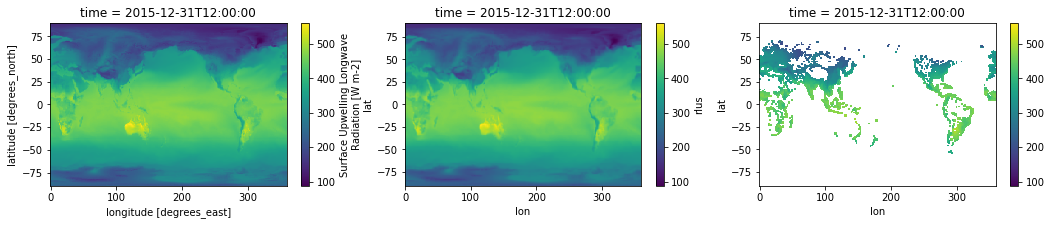

It takes elapsed_time 0.7423415184020996 to plot the layer
It takes elapsed_time 17.7419695854187 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rsds_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.6665315628051758 to load the data
*********Start to merge*********
It takes elapsed_time 0.03900718688964844 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.1076207160949707 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.4780592918396 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6578073501586914 to mask the layer
*********Start to plot the layer*********


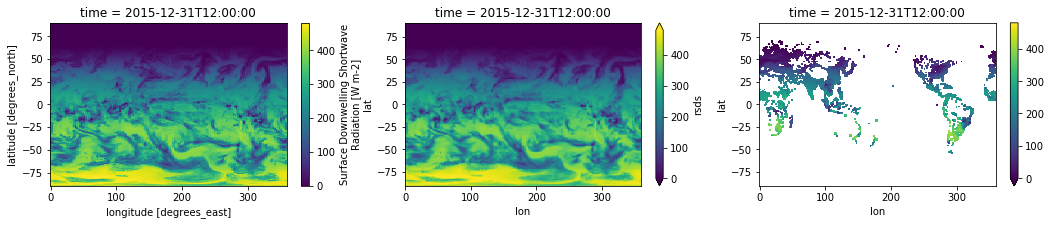

It takes elapsed_time 0.7367451190948486 to plot the layer
It takes elapsed_time 17.687516927719116 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rsus_day_MRI-ESM1_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.5539536476135254 to load the data
*********Start to merge*********
It takes elapsed_time 0.03975987434387207 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03427767753601074 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.486286878585815 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6580004692077637 to mask the layer
*********Start to plot the layer*********


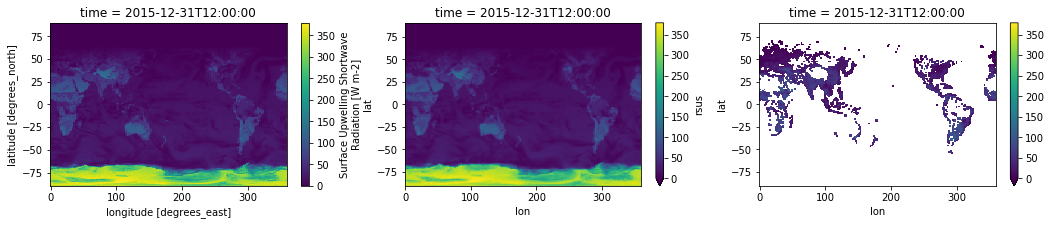

It takes elapsed_time 0.7595171928405762 to plot the layer
It takes elapsed_time 17.533039569854736 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 10)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 33.48582625389099 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

230.18966960906982


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/huss_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.6791157722473145 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/huss_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.6211636066436768 to load the data
*********Start to merge*********
It takes elapsed_time 8.763933897018433 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.031770944595336914 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.039666175842285 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6563277244567871 to mask the layer
*********Start to plot the layer*********


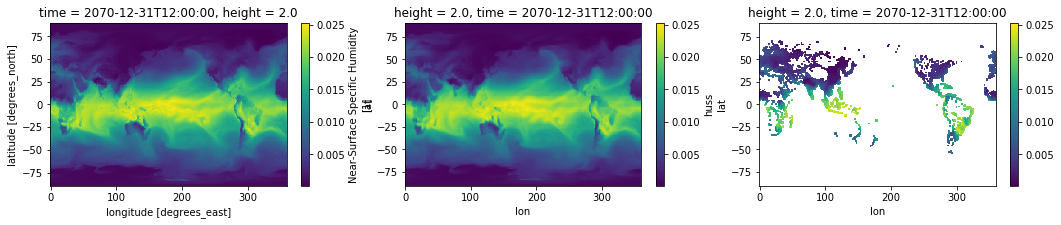

It takes elapsed_time 0.7098190784454346 to plot the layer
It takes elapsed_time 26.824115991592407 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/tas_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 0.9989326000213623 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/tas_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 2.0354127883911133 to load the data
*********Start to merge*********
It takes elapsed_time 9.123570442199707 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.032492637634277344 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.112665891647339 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6669225692749023 to mask the layer
*********Start to plot the layer*********


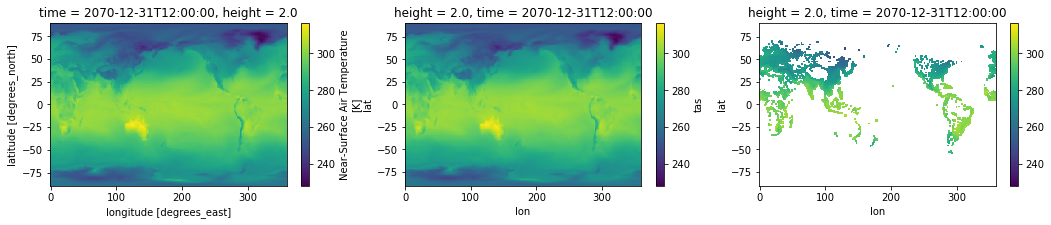

It takes elapsed_time 0.7142488956451416 to plot the layer
It takes elapsed_time 25.686578512191772 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/uas_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.7207739353179932 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/uas_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.056279182434082 to load the data
*********Start to merge*********
It takes elapsed_time 8.971087217330933 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.06039118766784668 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.062904119491577 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6679983139038086 to mask the layer
*********Start to plot the layer*********


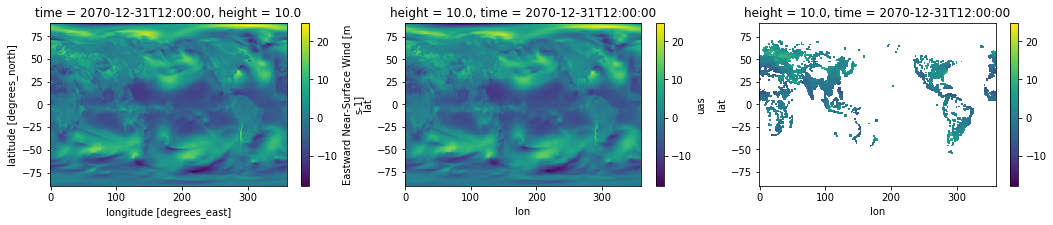

It takes elapsed_time 0.7384006977081299 to plot the layer
It takes elapsed_time 26.55871033668518 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/vas_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.869382381439209 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/vas_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.4067223072052 to load the data
*********Start to merge*********
It takes elapsed_time 8.715465068817139 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.062371015548706055 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.044824838638306 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6545088291168213 to mask the layer
*********Start to plot the layer*********


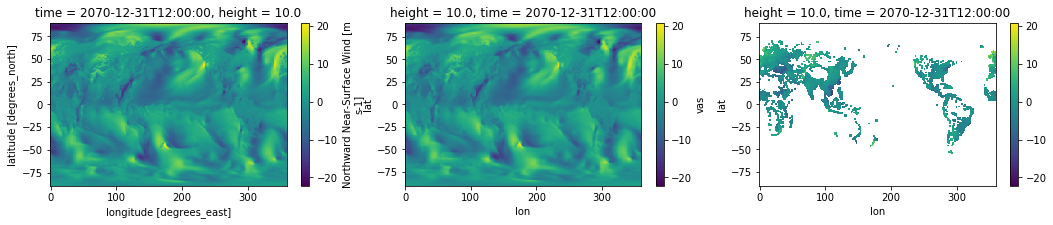

It takes elapsed_time 0.7313296794891357 to plot the layer
It takes elapsed_time 26.61613941192627 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/pr_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.7720777988433838 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/pr_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.0714194774627686 to load the data
*********Start to merge*********
It takes elapsed_time 8.568310022354126 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.09075355529785156 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.061718463897705 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6557023525238037 to mask the layer
*********Start to plot the layer*********


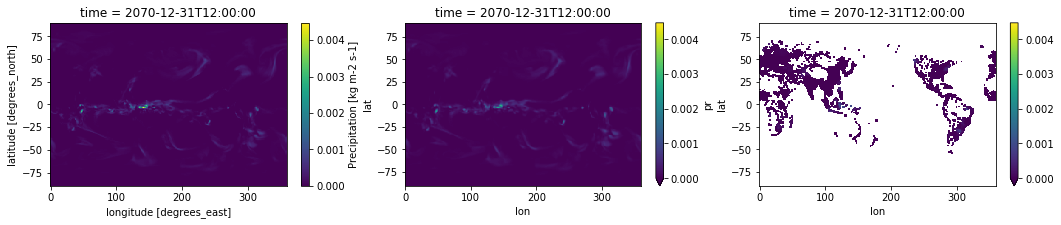

It takes elapsed_time 0.6719982624053955 to plot the layer
It takes elapsed_time 26.12083148956299 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/prsn_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 2.099815845489502 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/prsn_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.9178221225738525 to load the data
*********Start to merge*********
It takes elapsed_time 8.881583452224731 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03417801856994629 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.12827205657959 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6686348915100098 to mask the layer
*********Start to plot the layer*********


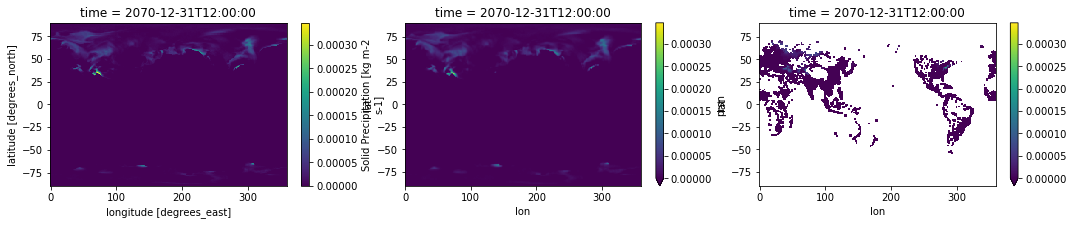

It takes elapsed_time 0.6977672576904297 to plot the layer
It takes elapsed_time 27.329277753829956 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rlds_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.399562120437622 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rlds_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.0905191898345947 to load the data
*********Start to merge*********
It takes elapsed_time 8.982448816299438 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.032486677169799805 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.17650818824768 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6685638427734375 to mask the layer
*********Start to plot the layer*********


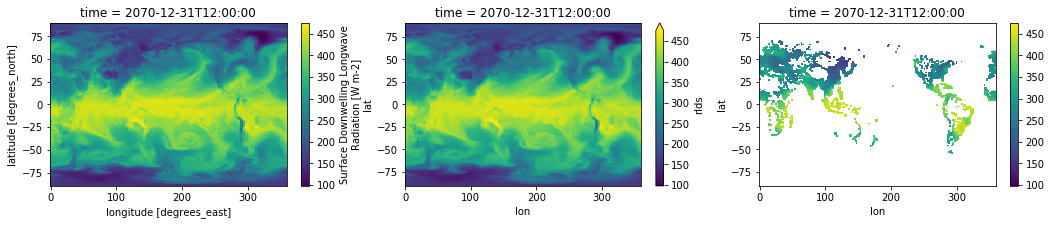

It takes elapsed_time 0.7613480091094971 to plot the layer
It takes elapsed_time 26.713472604751587 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rlus_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 2.1220455169677734 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rlus_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.809326410293579 to load the data
*********Start to merge*********
It takes elapsed_time 8.597231388092041 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03238368034362793 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.11286473274231 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6527585983276367 to mask the layer
*********Start to plot the layer*********


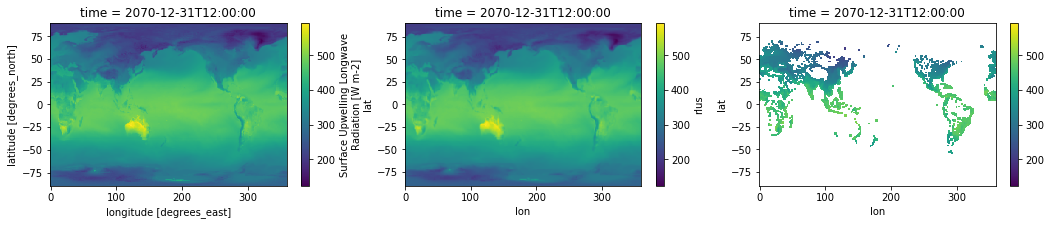

It takes elapsed_time 0.6995611190795898 to plot the layer
It takes elapsed_time 26.90483331680298 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rsds_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.7859234809875488 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rsds_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.360656499862671 to load the data
*********Start to merge*********
It takes elapsed_time 8.567859649658203 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.031630516052246094 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.030595541000366 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6483767032623291 to mask the layer
*********Start to plot the layer*********


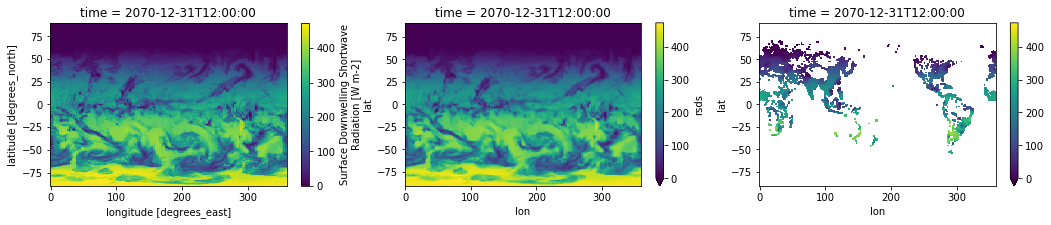

It takes elapsed_time 0.6975328922271729 to plot the layer
It takes elapsed_time 26.337545156478882 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rsus_day_MRI-ESM1_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.6455957889556885 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-ESM1/rsus_day_MRI-ESM1_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.0146186351776123 to load the data
*********Start to merge*********
It takes elapsed_time 8.85966181755066 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.05781745910644531 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.119413375854492 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6649022102355957 to mask the layer
*********Start to plot the layer*********


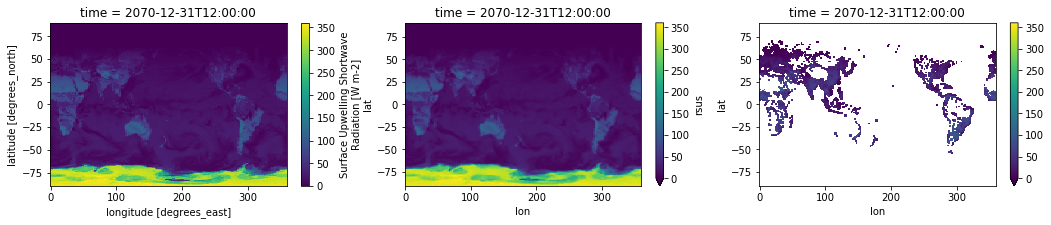

It takes elapsed_time 0.7353255748748779 to plot the layer
It takes elapsed_time 26.454397916793823 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2056, 2076, 10)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 37.50584554672241 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

227.24021196365356
